In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
data_frame = pd.read_csv("magic04.data",names=cols)
data_frame.head()
data_frame["class"] = (data_frame["class"]=="g").astype(int)

In the above code, we have made that columns for the pandas data frame created by reading the CSV file 'magic04.data'. In the method '<code>read_csv</code>', we pass the file path and a parameter called names to insert labels into the dataset. Finally to verify our work, we write the <code>head</code> method.

Then, we can notice that there are two 'classes', 'g' (gamma) or 'h' (hadron). All the other labels and their values are called features (like fLength, fWidth and more). Now, the AI component in this is to predict the class for a given data set of features. This type of work is called Classification.

Machine Learning is a sub-domain of Computer Science that focusses on algorithms which help a compiter learn from a data set without explicit programming. This means till now, we have been writing code to tell the computer exactly what computations to do and what results to print. Now, we feed the computer with largw datasets and let it learn from this data to do the work on its own without us programming it.

# Types of Machine Learning models

**Supervised Learning:**
In this model, we feed data to the computer with labels. Lets say we send a few pictures of different animals to the computer. These pictures are just pixels to the computer of certain color. When we label these pictures or data sets with the name of the animal, we may want the computer to predict that particular animal's name when another picture of the animal is sent.

**Unsuperivsed Learning:**
In this model, we feed data to the computer without labels. Lets say we send a few pictures of different animals to the computer. These pictures are just pixels to the computer of certain color. Now, the computer will scan through these pixels (or values) and find a pattern in them. It may not exactly find what the picture is, however, it can detect a pattern after continuous data feeding.

**Reinforcement Learning:**
In this model, we let the computer learn based on rewards or penalties.

# Supervised Learning (Input types)

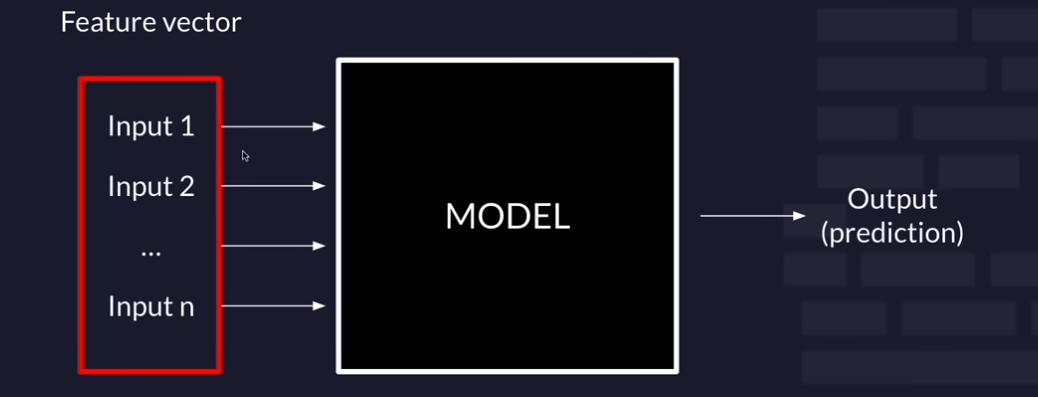

There are different types of features:
1. Qualitative: it means categorical data (finite number of categories of a data). Example: Gender, Nationalities. These categories can have an order or they cannot have an order. The above examples dont have an order. More on this:
  There is no inherent order (it is nominal data). For nominal data, we use something called one-hot encoding. This means if the data matches a category, it is marked one, else zero. Lets say there is a country field in the dataset. So, we may encode the countries:

  [USA, India, Canada, France] as 1.
  So, if country is USA, then it will be [1,0,0,0]. This means the data is from USA.
  SImilarly, if country is India, it will be [0,1,0,0]. This means the data is from India.

  So the matching country has value 1, and the remaining countries have 0.

  Now, there are certain features that can have order like Age or Ratings. Obviously in age on ascending order, a baby will be put first and an elderly person will be put last. On ratings in ascending order, the lowest rating is put first and the highest at last. These features will not make sense without an order. They are called Ordinal Data.

  2. Quantitative Data: numerical value data (could be discrete like integers or continuous like real numbers).




# Supervised Learning Output types

Now we have certain types of outputs that can be generated.
1. Discreate Classification: Here, the computer predicts discrete classes. For a particular set of pictures with labels, the computer may be able to predict another picture given at a later time as a specific label (or class) based on the given input. This is called Multiclass classification.
In Binary classification, there are only two classes. Either the two classes can be like "something" and "not something" (example "HotDog" and "not HotDog"), or actual two classes.

2. Regression: Predict continuous values, like future price of something.  

# Supervised Learning (Model)

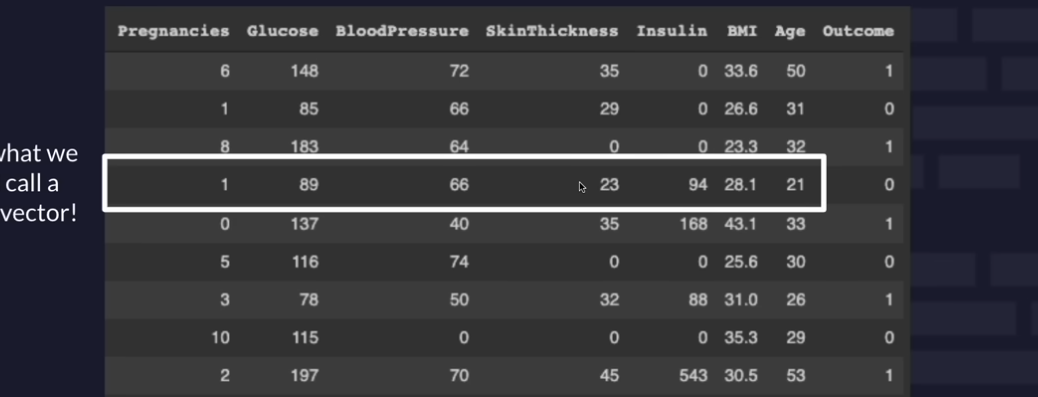


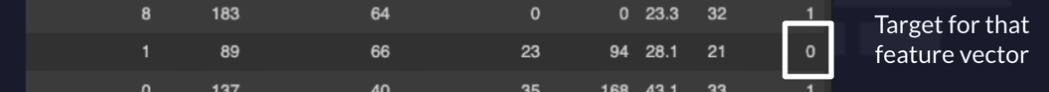

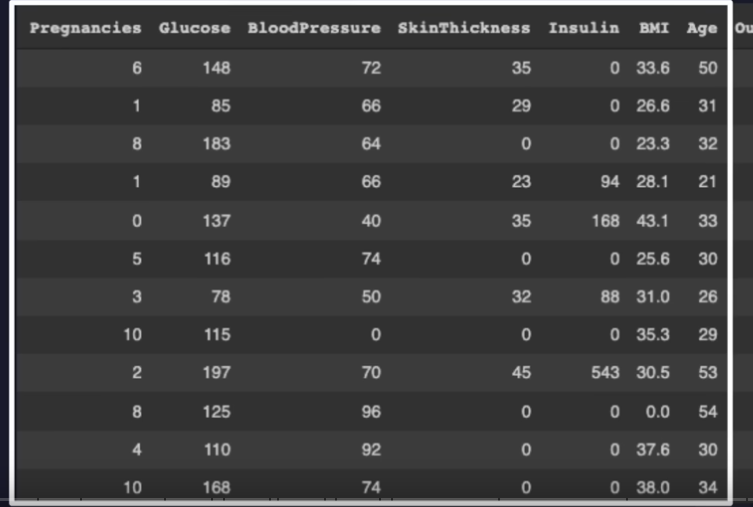


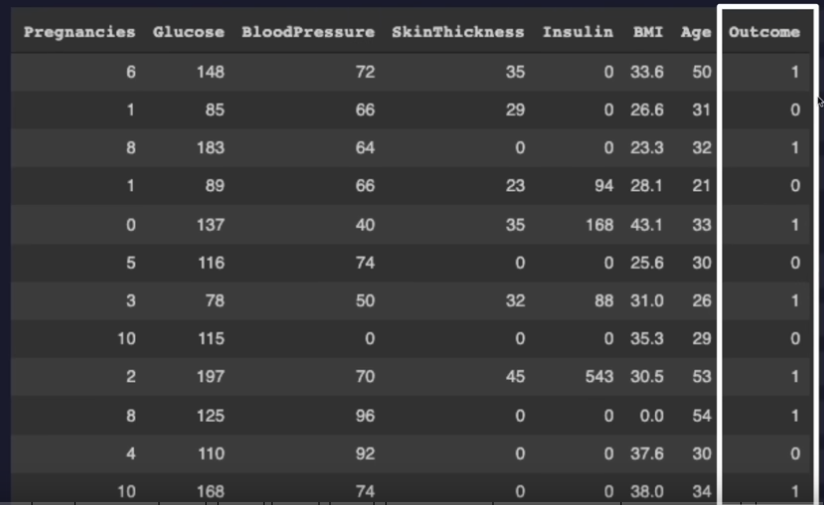



The process for training goes like this:
We take our feature vector, put it into some piece of code (which is the model), allow the computer to predict the output. Then, we compre the computer's output to the actual given output. This comparison is the best part of supervised learning where we can actually compare the predicted output and make corrections if we are wrong.

In supervised learning, we divide our dataset into three parts: the learning dataset, the validation datasets and the testing datset. Most of the data is used for training, the percent share is 60,20,20 respectively or 80,10,10. Now, we feed the training dataset to the model and see how much is difference from the actual output. This difference is also called Loss. After looking at the loss, we make further and further adjustments to the model. This is the training process. Time and again we can also feed the validation set to the model for testing. However, we should not make adjustments based on the results and loss from validation dataset, which ensures that this data remains unseen for the model.

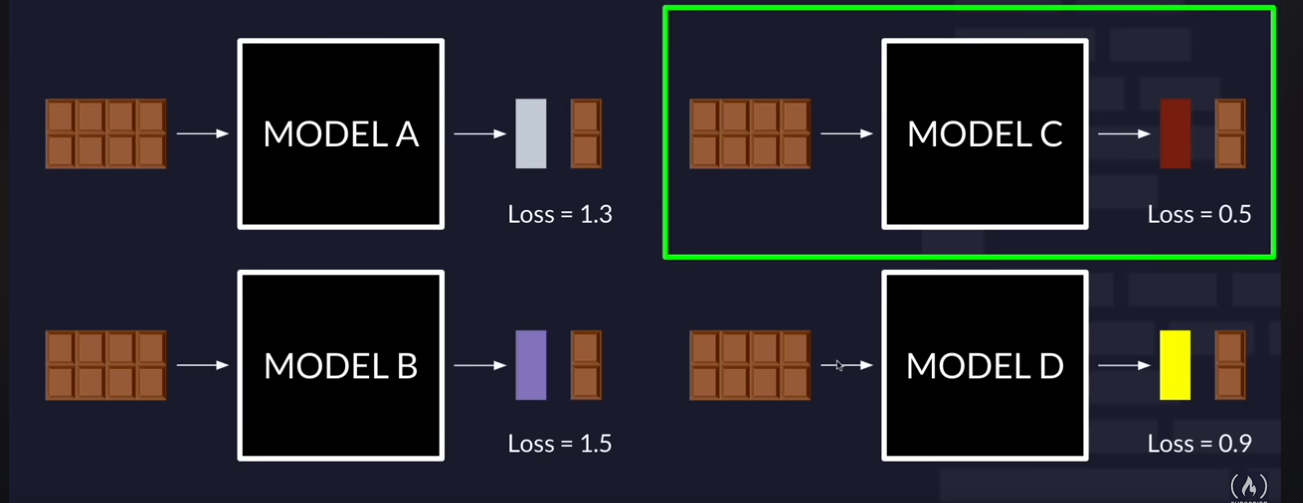

Lets assume model C performs best. Now, we need to give it the testing data set at the last and make the final reported performance based on the loss. Loss is the difference between prediction and the actual output. This loss can be given in terms of Mathematical formulas:

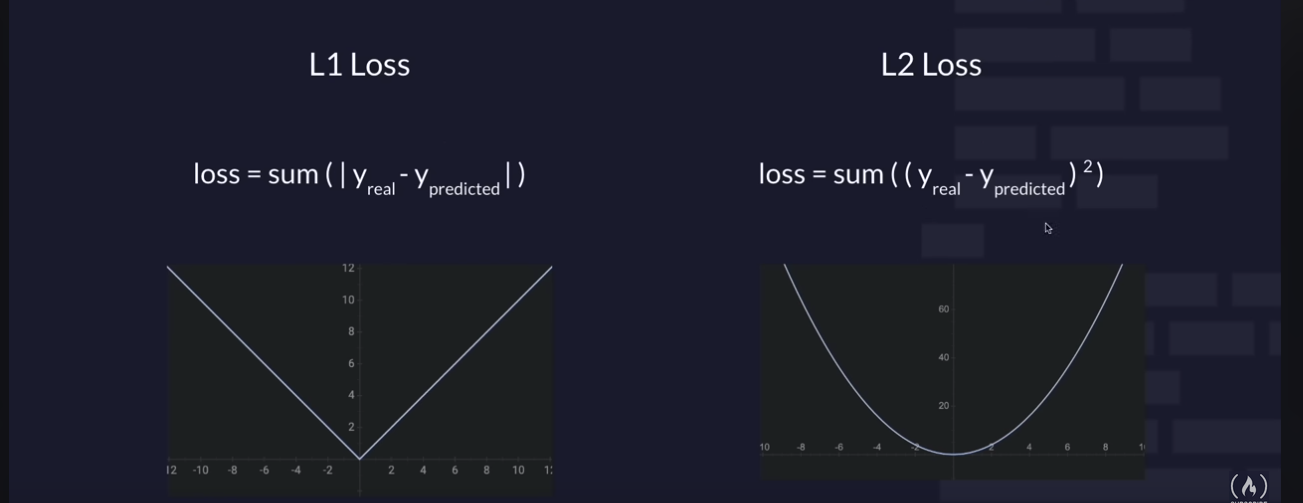

In both the formulas, 'sum' is to sum up all the data points. Also, in L2 Loss, if the value is close enough, penalty is minimal but at the same time, if the value is far off, the penalty is very large. Then, there is something called Binary Cross-Entropy Loss, which is used for Binary Classification.

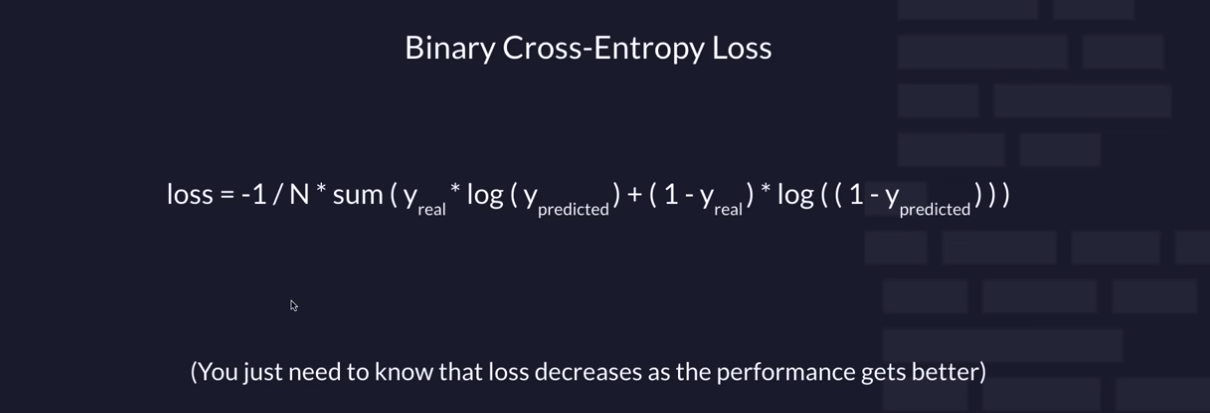
 Accuracy is correct/incorrect.


In [ ]:
data_frame.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

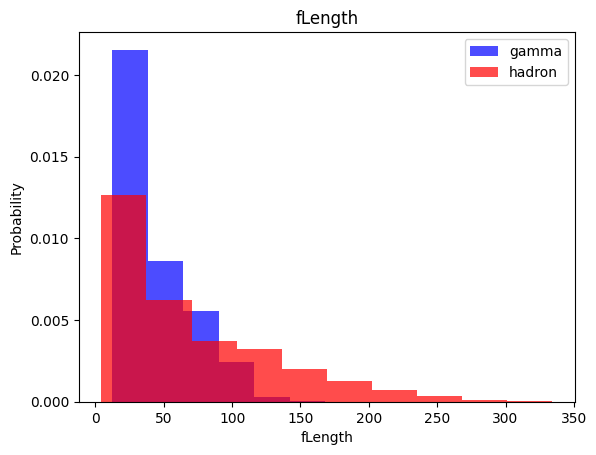

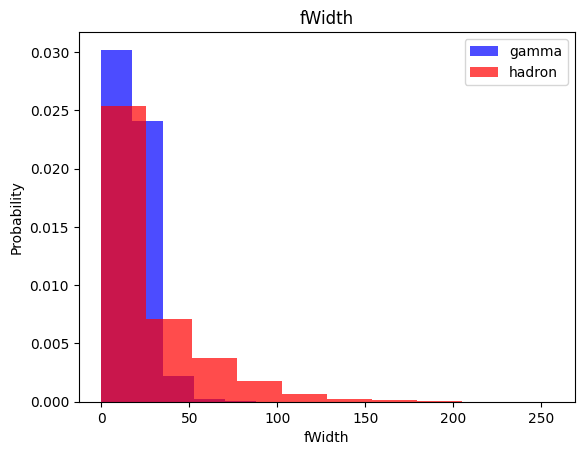

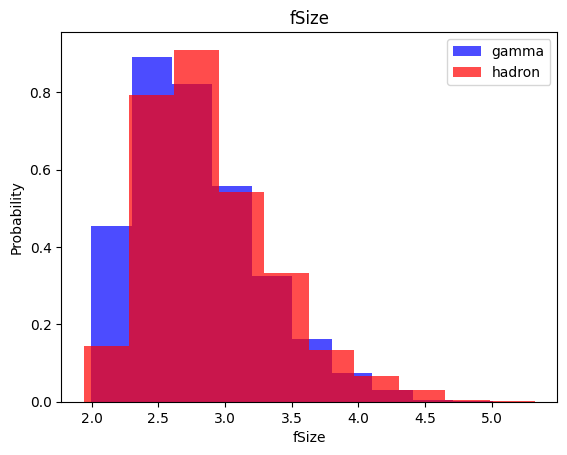

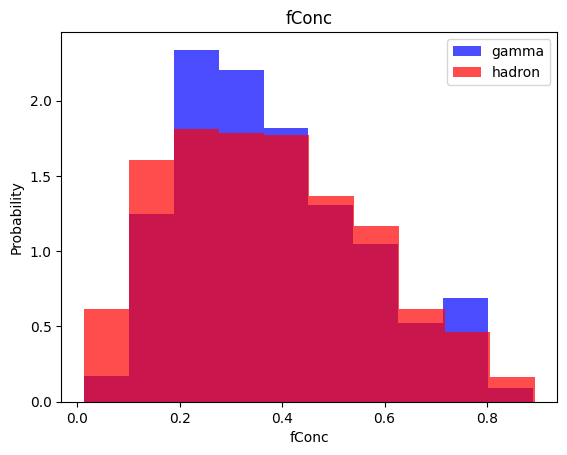

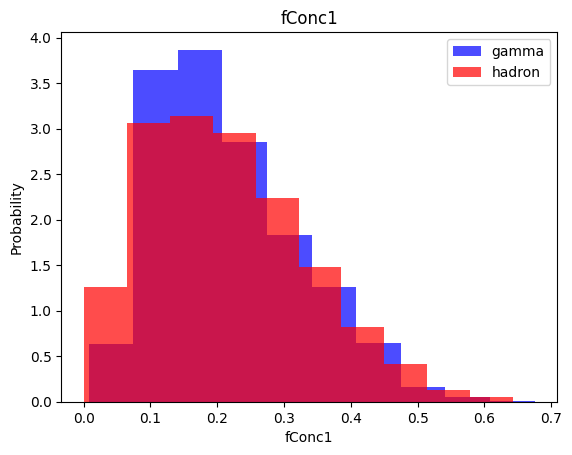

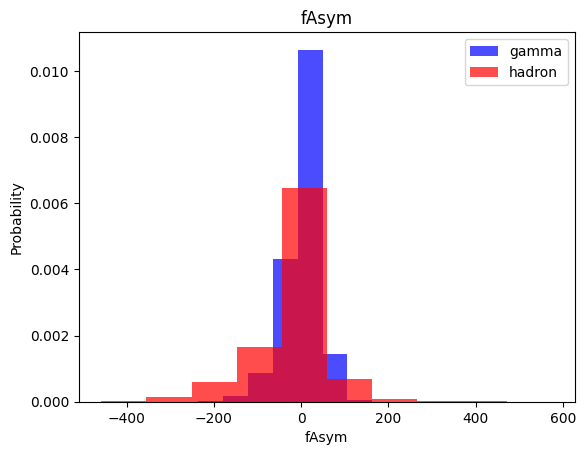

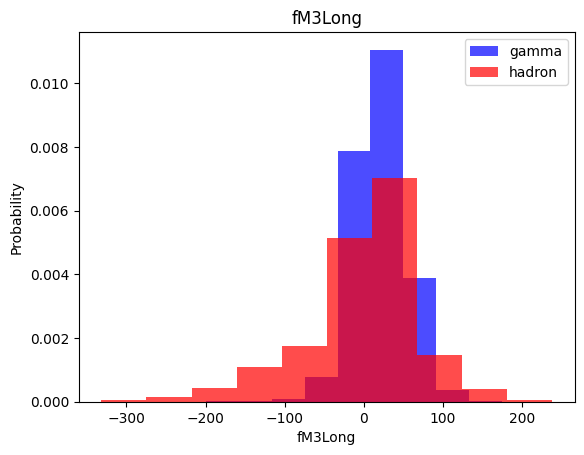

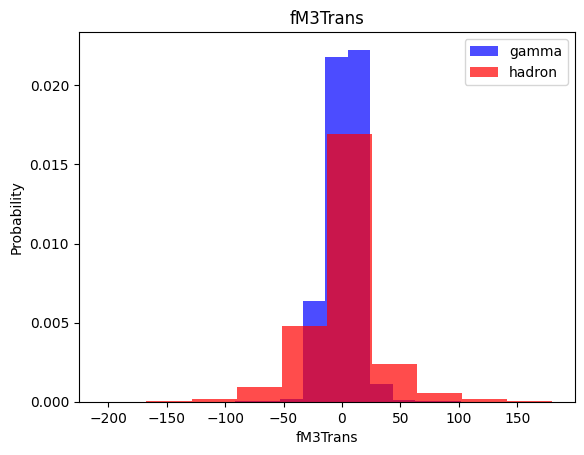

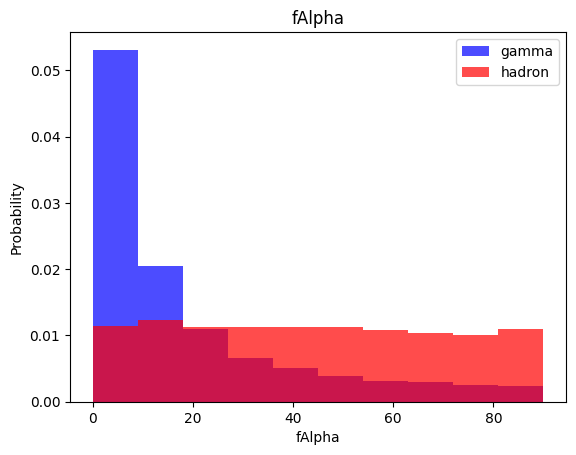

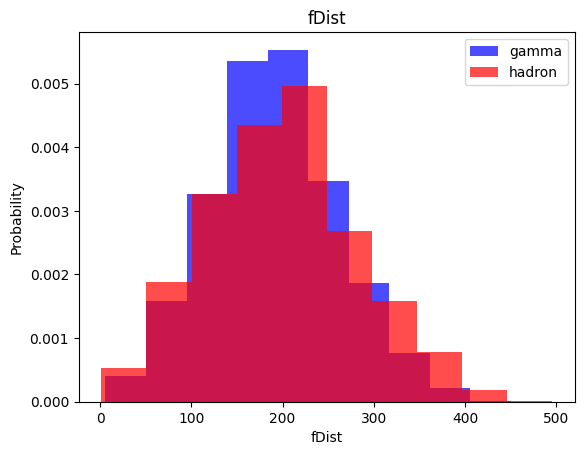

In [ ]:
for label in cols[:-1]: #class label should not display.
  plt.hist(data_frame[data_frame["class"]==1][label],color="blue",label="gamma",alpha=0.7, density=True)
  plt.hist(data_frame[data_frame["class"]==0][label],color="red",label="hadron",alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Train, validation and test datasets

In [ ]:
train, validate, test = np.split(data_frame.sample(frac=1),[int(0.6*len(data_frame)), int(0.8*len(data_frame))])
# Here, the first parameters shuffles up the given data. Then, the second parameter shows  60% of the data splitting to training set. The 60-80% is to validate. The 80-100 is to test dataset.

In [ ]:
def scale_dataset(df,oversample=False):
  X= df[df.columns[:-1]].values #all except last column
  Y= df[df.columns[-1]].values #last column
  scaler = StandardScaler()
  X = scaler.fit_transform(X) #fit and transform 'X'. This means fit the standard scaler to x and transform all the values.
  if oversample:
    ros=RandomOverSampler()
    X,Y = ros.fit_resample(X,Y) #equate the amount of data iinr in both classes.
  data = np.hstack((X,np.reshape(Y,(-1,1)))) #x is a 2d object, Y is 1-d, so use horizontal stack

  return data, X, Y

In [ ]:
train, X_train, Y_train = scale_dataset(train,oversample=True)
validate, X_validate, Y_validate = scale_dataset(validate,oversample=True)
test, X_test, Y_test = scale_dataset(test,oversample=True)


In [ ]:
sum(Y_train==0)

7455

# SOME LEARNING MODELS

**K-nearest neighbors**

In this, you look at the nearest neighboring points after plotting out a sketch for your data.

1st step: define distance function (Euclidean distance):
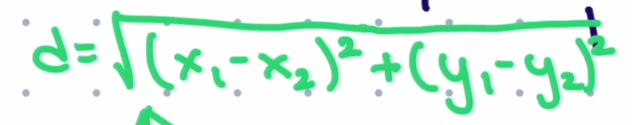


The 'k' in the name is the number of neighbors use. Generally, k is 3 or 5.

The graph below has X-axis to be income in 1000s of dollars per year and Y-axis to be number of children.

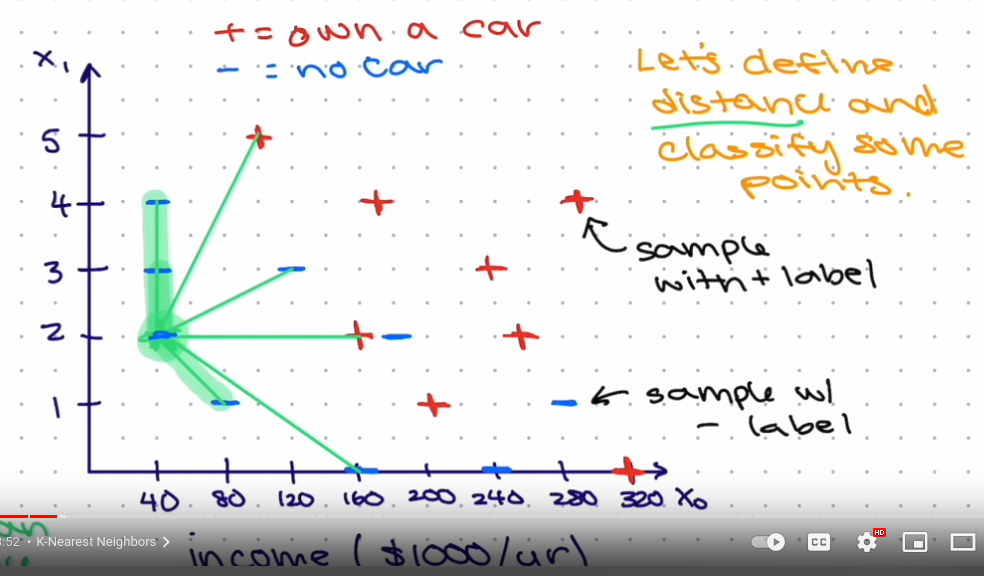

Now, when k=3, in this graph, we are considering the 3 nearest nighbors, highlighted in green. So, by this, they probably dont have a car. Now, if a family makes $240K per year and has 4 kids as shown in the graph below:

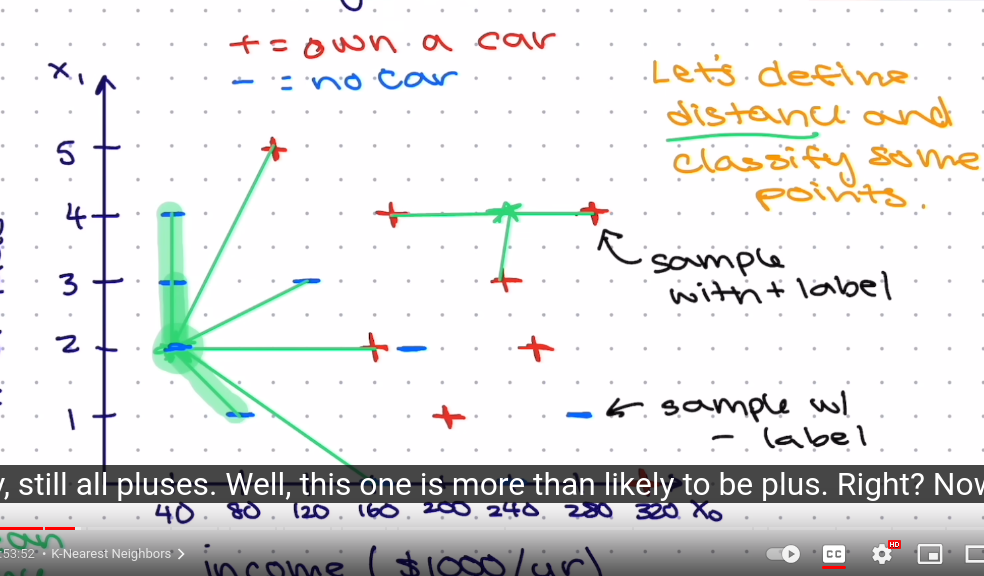

This point mostly likely has a car, because the 3 nearest neighbors have a car which are shown in green lines.

**K-nearest neighbors continued.**

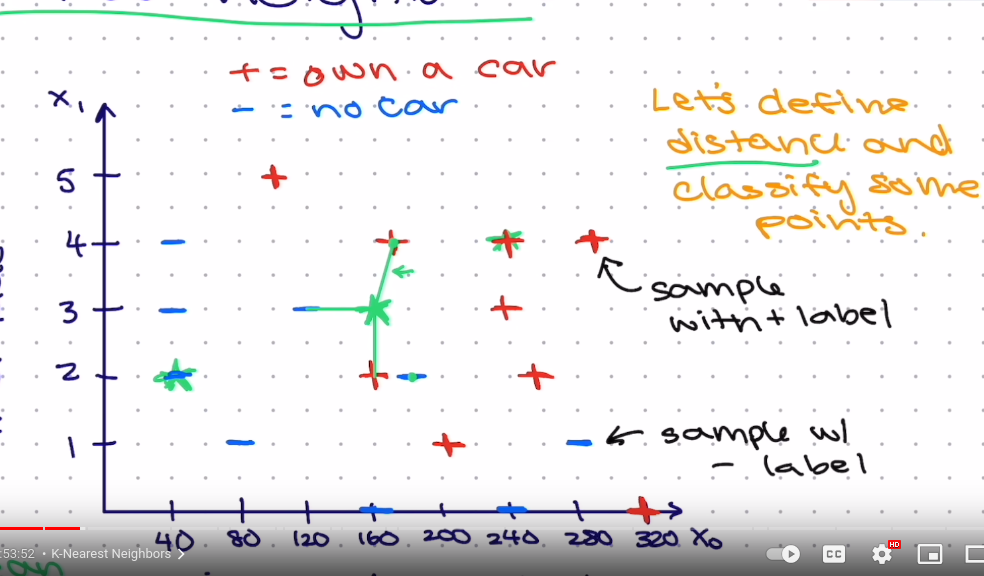

For the case shown above, the majority has car (or + sign). So, the point is also  or has a car.

# kNN code

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79      2439
           1       0.76      0.89      0.82      2439

    accuracy                           0.81      4878
   macro avg       0.82      0.81      0.80      4878
weighted avg       0.82      0.81      0.80      4878



**Naive Bayes Model**

Bayes Rule:

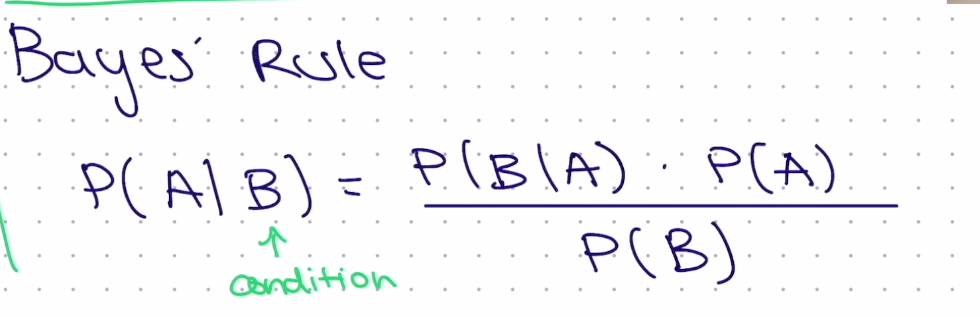

Another Form:

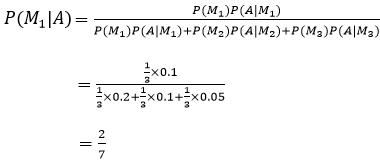


The Naive Bayes model is that if there is a feature vector and there are various categories C1, C2, C3 .. Ck, then given this feature vector, what is the probability the feature will fit to the above categories?? this is the model. This part is called Posterior.
Likelihood means if the category is given, what is the probability of seeing the feature vector.
Prior means in the entire population of things what is the probability of the particular class.
Evidence is the probabiity of the evidence occuring based on which we are constructing the posterior or the probability to be found.


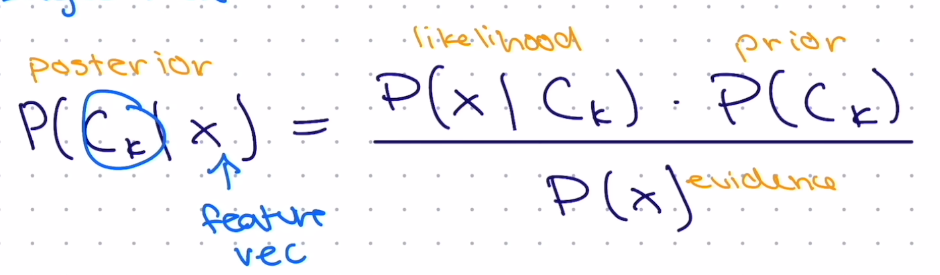

**Naive Bayes rule**

The below probability is a rule of Naive Bayes model.

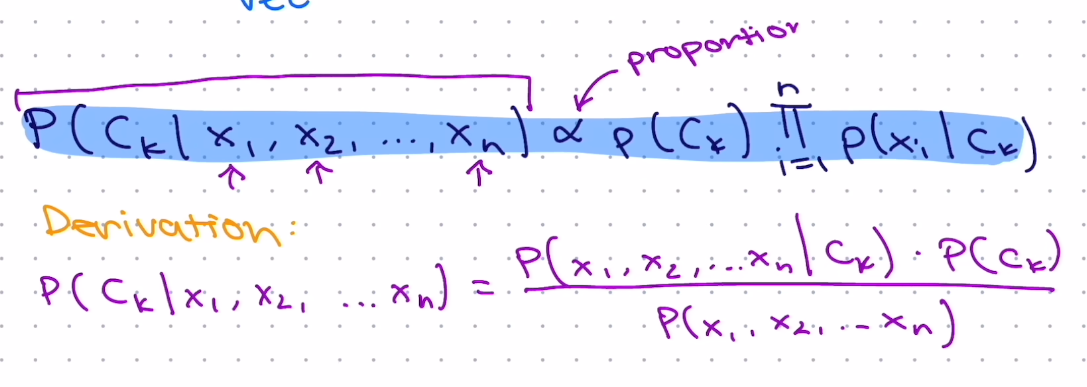

The denominator is constant and does not depend on the class.

The naive part of this model is we assume all feature vectors to be independent. The 'pi' type symbol is for multiplication.

Here comes a $\hat{y}$ to make classification.

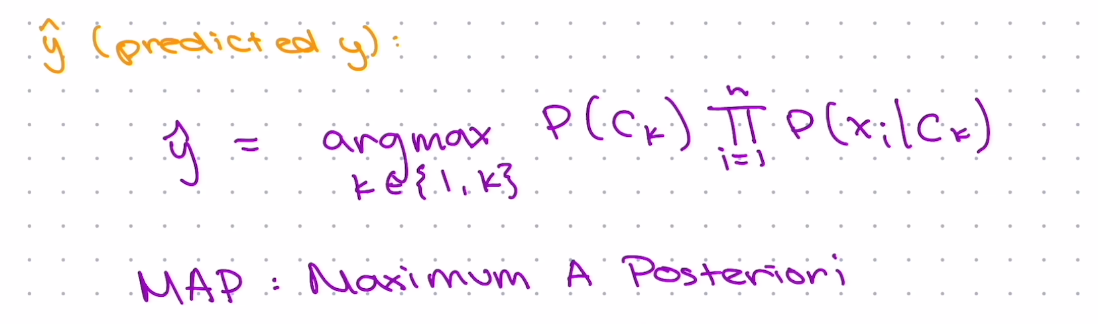


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model= nb_model.fit(X_train,Y_train)

In [ ]:
y_pred = nb_model.predict(X_test)

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.38      0.51      2439
           1       0.59      0.89      0.71      2439

    accuracy                           0.64      4878
   macro avg       0.68      0.64      0.61      4878
weighted avg       0.68      0.64      0.61      4878



# **Logistic Regression**

X-axis is features (or any one feature.)

Y-axis is the labels.

In this model, we are estimating not actual qunatities but probability or $\hat{y}$. While, for real values, the LHS has to go through all real numbers, the LHS has to stay at [0,1] for probability.
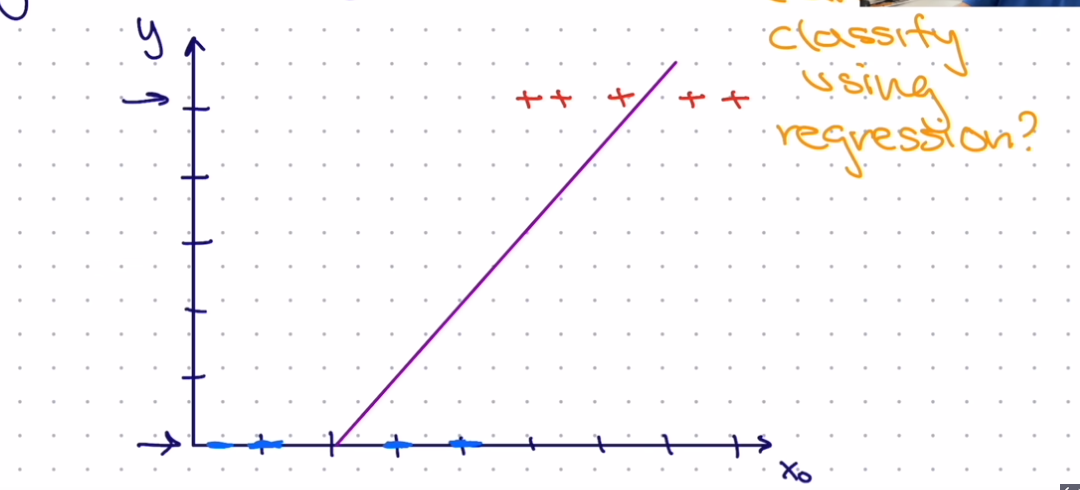

Thus, this regression line can be the 'odds in favor' = mx+b. 'p' is probability.


p/(1-p) = mx+b.

In this case as well, the RHS can be negative by various reasons. To fix that, we take the natural logarithm of the LHS.

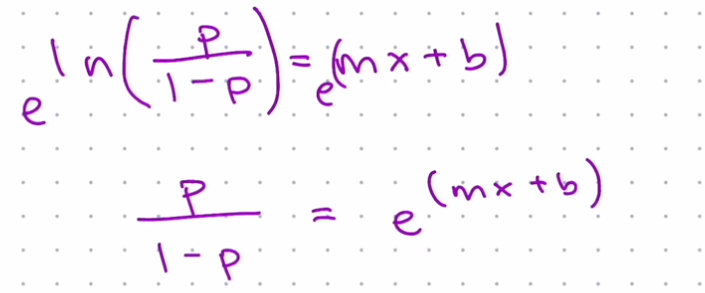


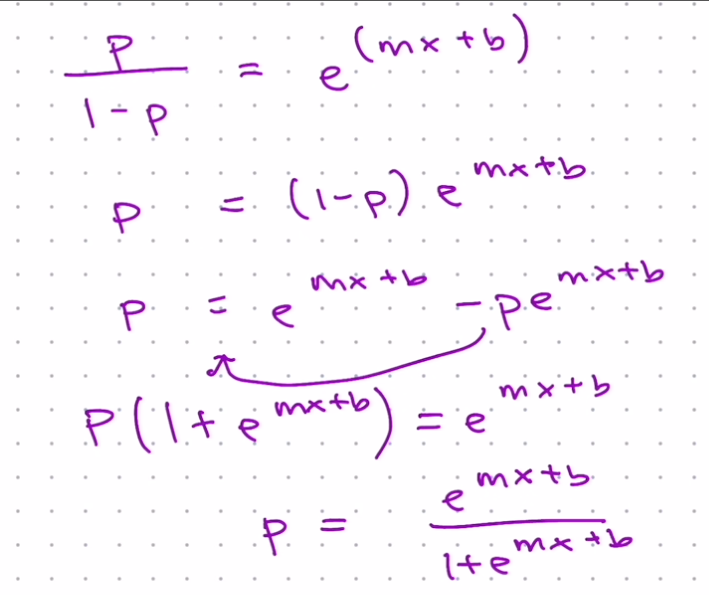


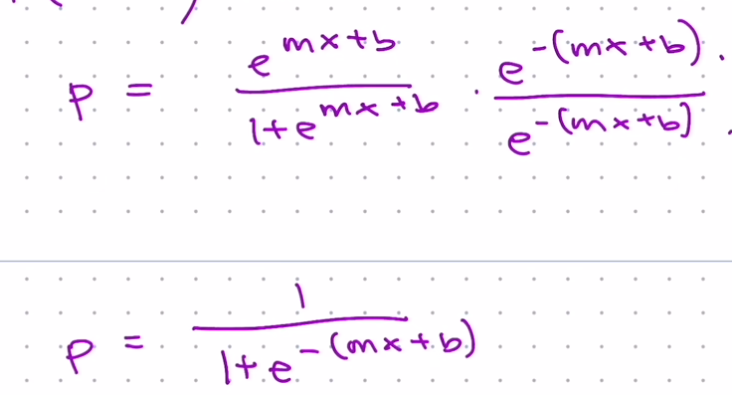


this function is called sigmoid functon. The above is a special form of sigmoid function. General form of sigmoid function:


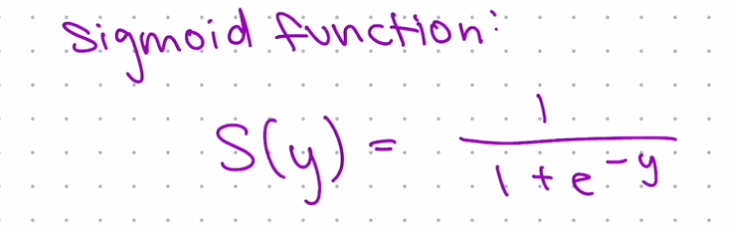

# **Logistic Regression continued**

> Indented block



The visual graph of this sigmoid function is:

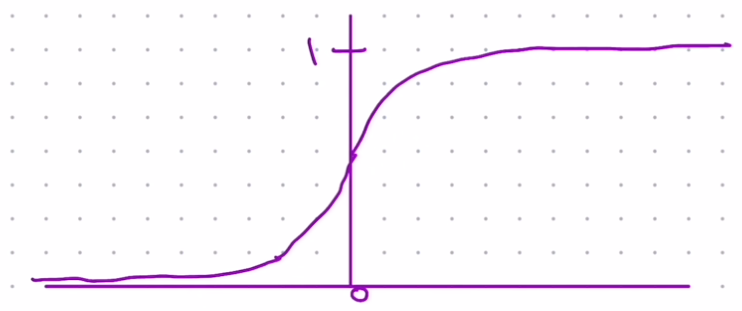


This fully goes between 0 and 1. So, the original graph can be plotted as:


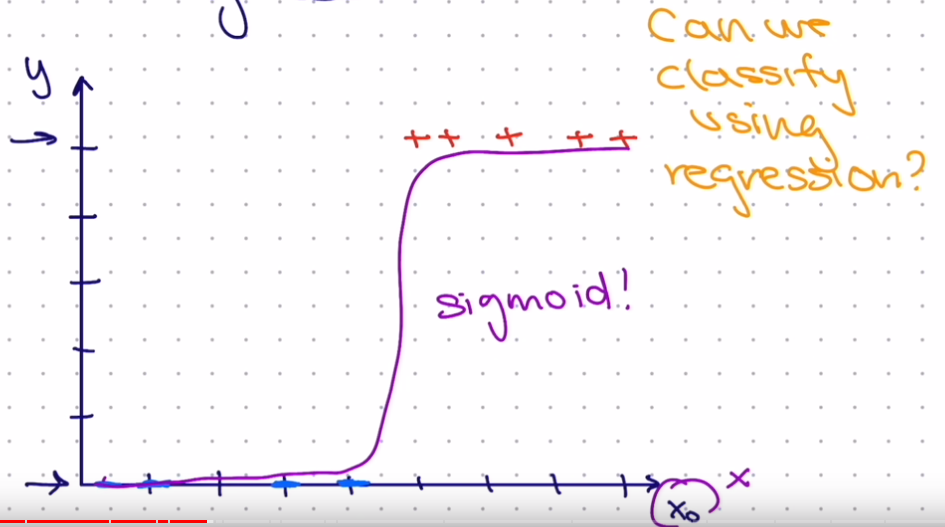


If we have just on feature, it is called simple logistic regression. For multiple features it is called Multiple Logistic regression.

# Logistic Regression Implemented

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model= lg_model.fit(X_train,Y_train)

In [ ]:
y_pred = lg_model.predict(X_test)

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.70      0.75      2439
           1       0.73      0.82      0.78      2439

    accuracy                           0.76      4878
   macro avg       0.77      0.76      0.76      4878
weighted avg       0.77      0.76      0.76      4878



**Support vector machines (SVM)**

The X-axis is feature X0

The Y-Axis is feature X1.

The + and - sign show class 1 or 0. The goal is to find a line that best divides the data properly in half. THis is in 2 D axis. In 3D, the same model would need a plane and so on. So, we have to find the hyperplane to differentiate the two classes.



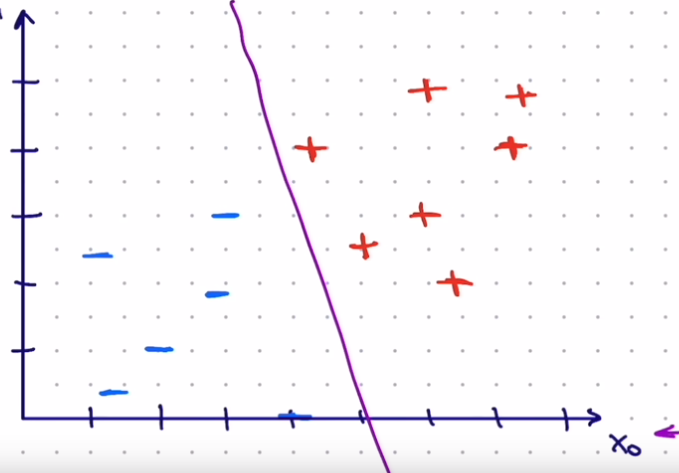



Lets have 3 lines to divide the data.


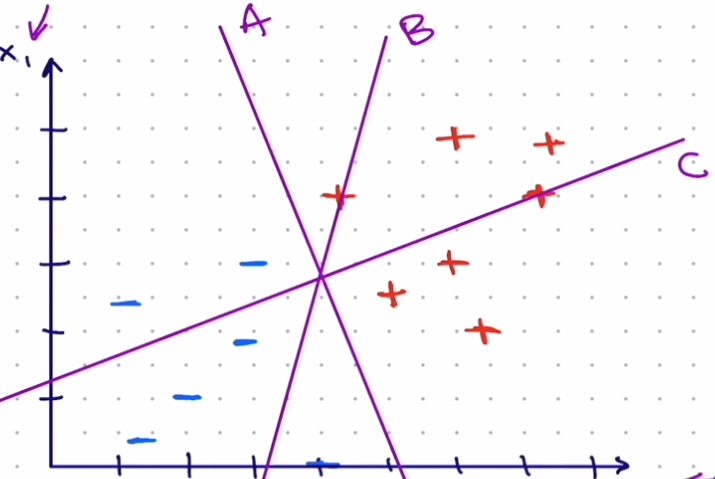




Out of the 3 lines, A divides class 0 to one side '-', and the '+' class 1 to the two sides. This line A also is the best because of something known as margin. This is the boundary between the two sides. In A, we can clearly find the boundary as shown here:



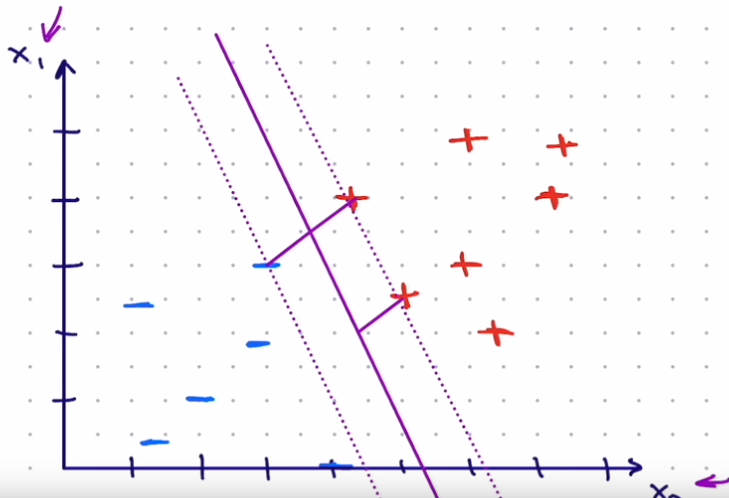


The 2 dotted lines are the margins. A has the largest margin. Also, the dotted lines are equi distant from A. The data points right on the margin is called SUppport Vectors. SVM is not so robust to outliers.

**SVM Continued**

A 1-D dataset is given:

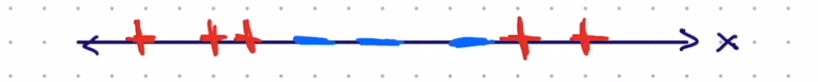



For this, we cant have two lines. Hence we can use a projection. Let us take one such projection:


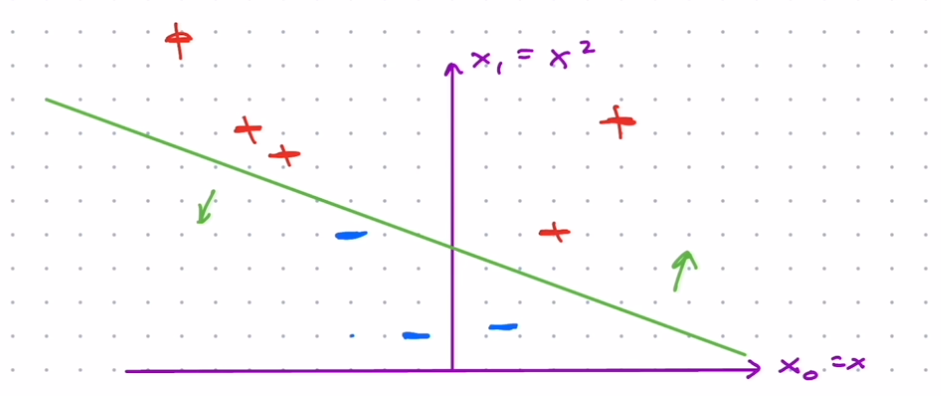



In this case, it was very easy to work with the points and we could get a clear line of seperation. Try to go over the deep mathematical stuf of these models. This projection is called Kernel Trick.

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC() #we can change a lot of the parameters if used for production level models in all cases.
svm_model.fit(X_train,Y_train)

SVC()

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      2439
           1       0.80      0.90      0.85      2439

    accuracy                           0.84      4878
   macro avg       0.85      0.84      0.84      4878
weighted avg       0.85      0.84      0.84      4878



# Neural Networks

**Neural Networks**

In a neural network, we input various features from x0 to xn. All these are weighted by specific values, like w0, w1 ... wn. All these features are multiplied with their weights and they move into the neuron (each product is added). The bias term will shift this by a bit. The output of all these goes into something called Activation Function. The value of this function is the output.

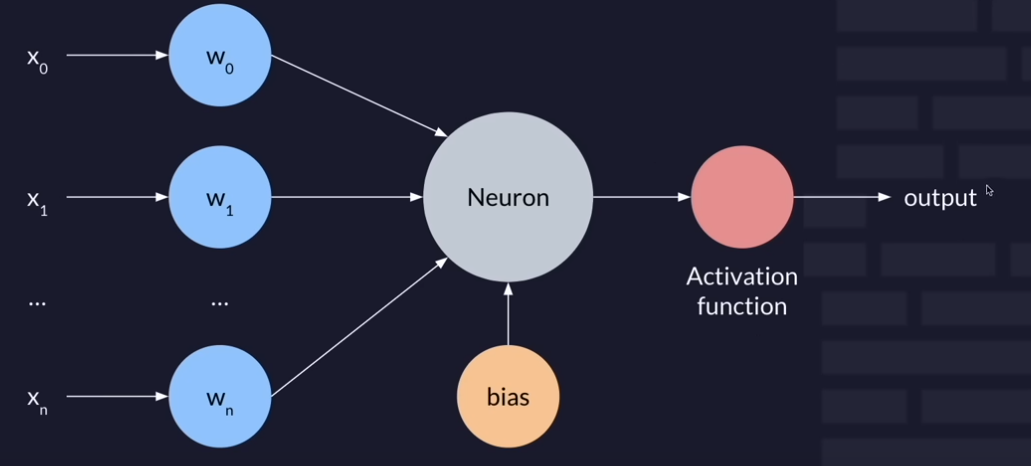



An activation function makes the input and output non-linear.


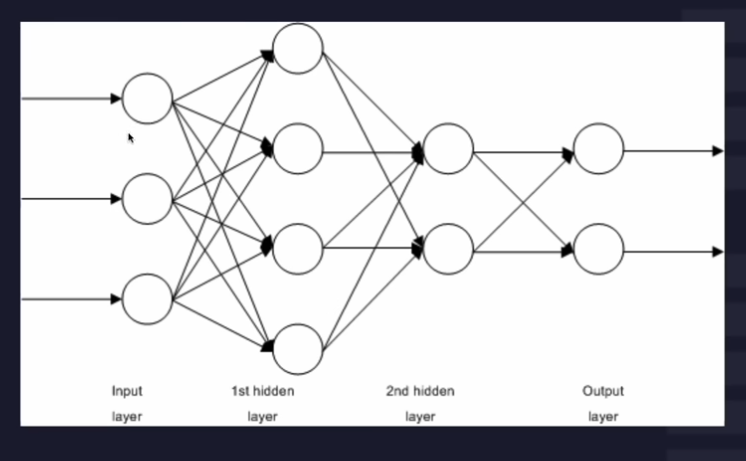

In a neural network like this, we are just multiplying the features with weights and adding them up a bunch of times. When we keep on adding them as in here, the input to output relation becomes a linear model which might remove the need of a neural network at all. Hence, the activation function makes this relation non-linear.

Critically, if the input-output relation were linear, then there is no difference between a neural network and other models previously seen. The activation function prevents the output of one neuron to collapse itself on another one and become linear.

In an L2 loss function, we can do something called Gradient Descent to keep minimizing the loss or penalty. So, in neural networks, at different weights, we have different gradients getting closer and closer to the true answer. This is what actually happens during training.



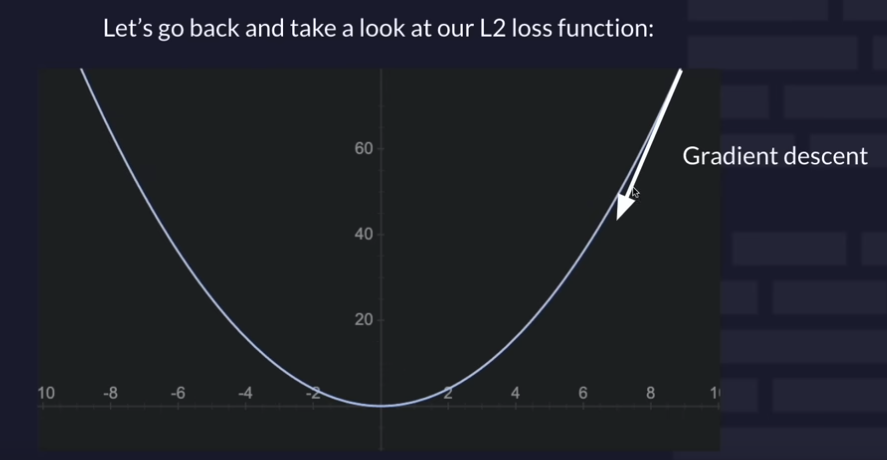



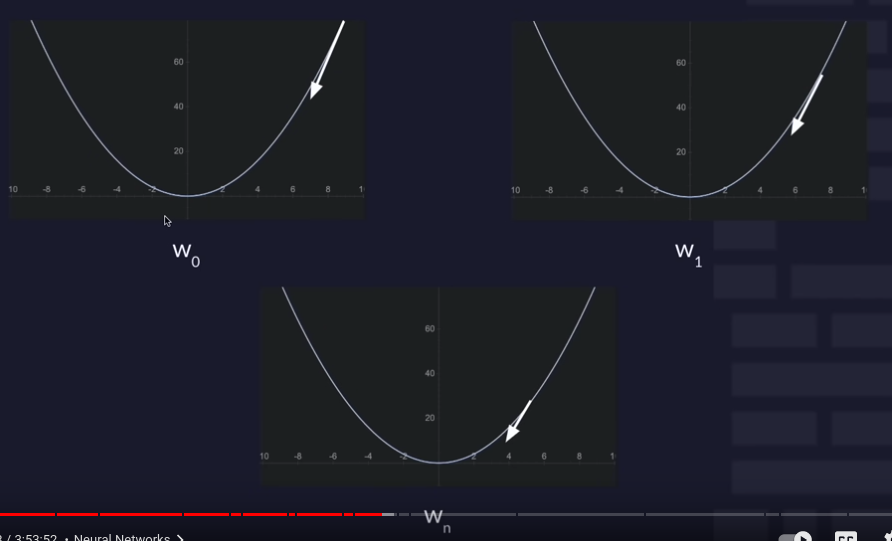




The slope is different at different weights. So, we can say that the weights can contribute to the loss at different rates, which can be done using calculus.


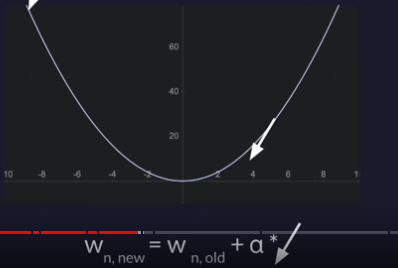



In this equation shown below, we assign a new valu for wn based on the equation. THe down arrow is a negative slope or gradient. The alpha symbol is called Learning Rate which basically determines how fast the neural networks converge or even diverge if the value of alpha is very large. THis entire process is called Weight Update. Going through the L2 Loss function in Gradient Descent is known as Back-Propogation.



Tensorflow makes it easy to define neural networks and give us more control. This is a very popular machine learning library. An example code of TensorFlow is as below:

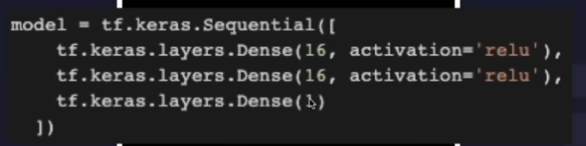


Some examples of activation functions are:

Sigmoid function: Which formula we have seen above and it runs between 0 and 1.

Hyperbolic Tan is also such a function.

ReLu means the function which is 0 for all negative values, and linear for all positive values.

Here, we are creating a model. It says there must be sequential layers and descibes how they should be:

First layer should be Dense with 16 nodes and have the 'relu' activation function.
Second layer should be the dsmr.
Finlly there is an output layer with just one node.






In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4)) # this asks for one row and two columns in that row for the plot.
  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'],label='val_loss') #val_loss is validation loss
  ax1.set_xlabel('Epoch') #epochs is training cycles. So, it plots the loss over all training cycles this neural network runs
  ax1.set_ylabel('Binary crossentropy')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'],label='accuracy')
  ax2.plot(history.history['val_accuracy'],label='val_accuracy') #val_accuracy is validation accuracy
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')

  ax2.grid(True)


  plt.show()



In [ ]:
def train_model(x_train,y_train, num_nodes, dropout_prob, learning_rate,batch_size,epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob), #this layer randomly chooses nodes at the training stage and does not train them in certain iterations or epochs. THis dropout also prevents overfitting.
      tf.keras.layers.Dense(num_nodes,activation='relu'),
      tf.keras.layers.Dropout(dropout_prob), #this parameter is the probability of turning off a node during training.
      tf.keras.layers.Dense(1,activation='sigmoid') #sigmoid graph helps in classification as just 0 or 1.
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',metrics=['accuracy'])
  history = nn_model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size, validation_split=0.2, verbose=0)


  return nn_model,history

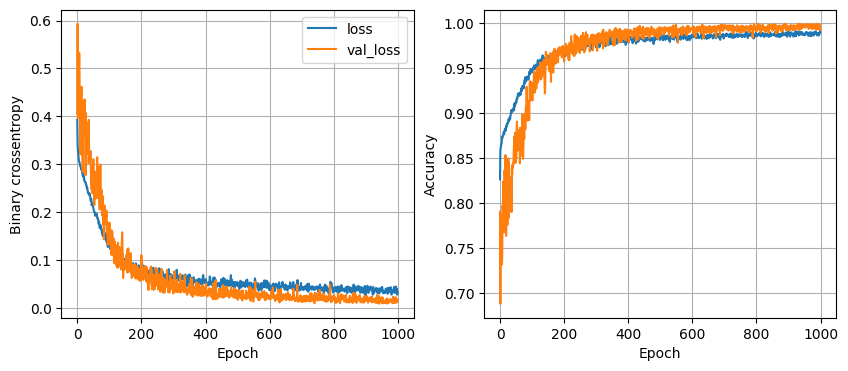

153/153 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      2439
           1       0.79      0.89      0.84      2439

    accuracy                           0.83      4878
   macro avg       0.83      0.83      0.83      4878
weighted avg       0.83      0.83      0.83      4878



In [ ]:

model, history = train_model(X_train, Y_train, 128, 0.02, 0.01, 200, 1000)
plot_history(history)
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(Y_test, y_pred))



# Linear Regression

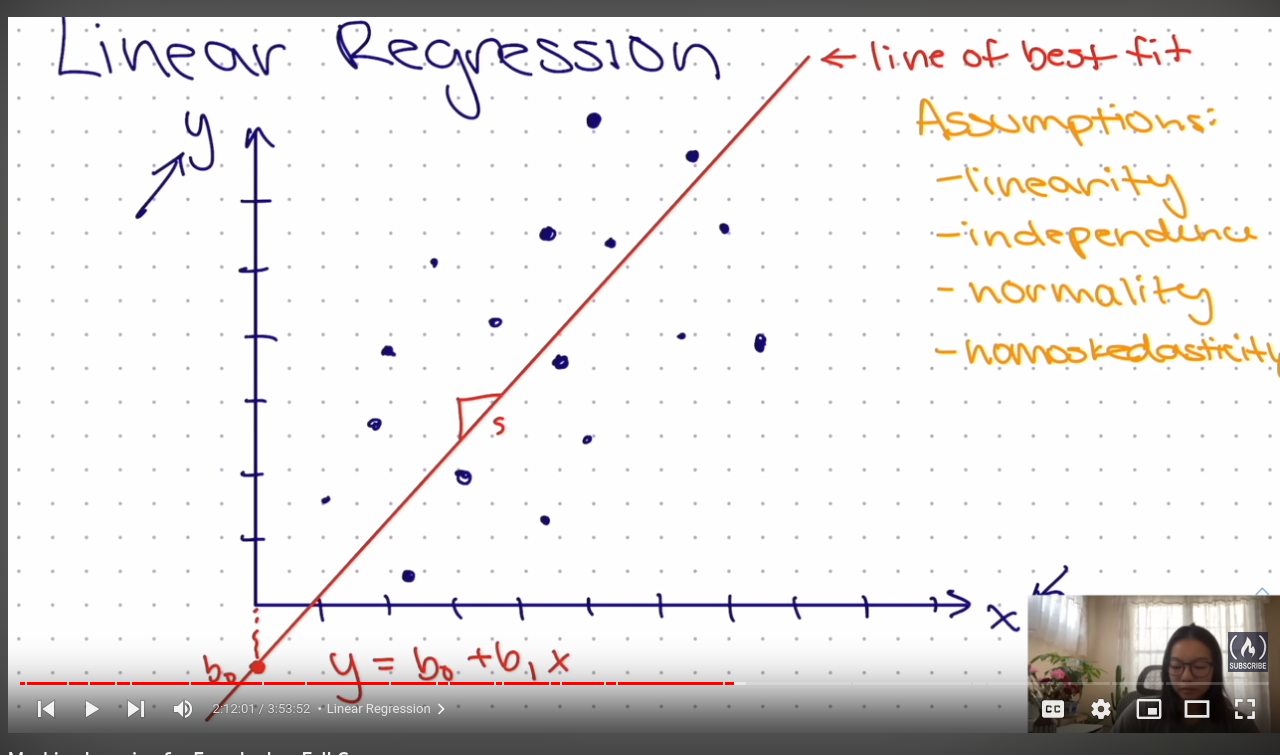


In this model, we work similar to the mthematical thing of finding line of best fit. There are some assumptions also listed here. Here, it is obvious b0 is the y-intercetp and b1 is the slope.The residual is also called error. This is the distance between the actual value of 'y' at some particular 'x' and the value predicted by the line of best fit. The goal is to reduce the value of the residual.


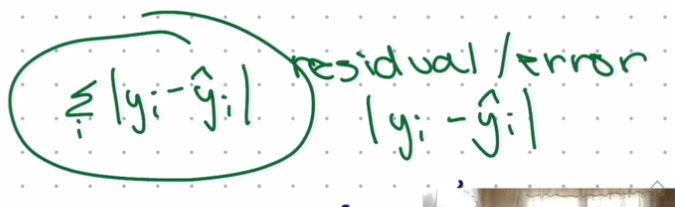





In the above formula, the 'y' with the hat is the prediction. So, the absolute value of this distance is added up for all the points and we have to reduce it to the minimal possible values. Some cases might take the square of the absolute value for more accuracy and more penalty for incorrect values. This is called Simple Linear Regression.

Multiple regression evaluates for more than one feature vector.

Now, there are certain assumptions listed. The first is linearity. This means the line of best fit must be linear. Independence means all samples are independendent on the others.

Next to look at normality and homoskedasticity. This needs the plot of the residual. For a plot of data points something like the below and the line of their best fit:


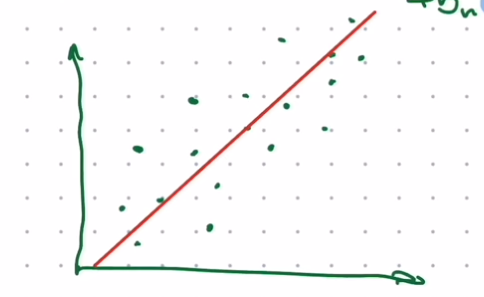



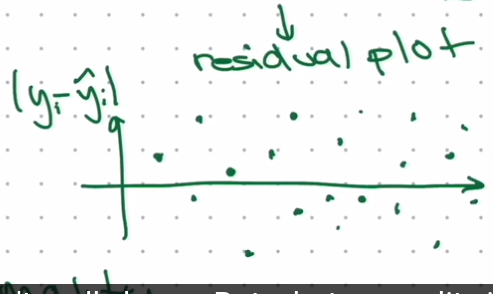



Normality means the residuals must be normally (or perpendicularly) distributed.


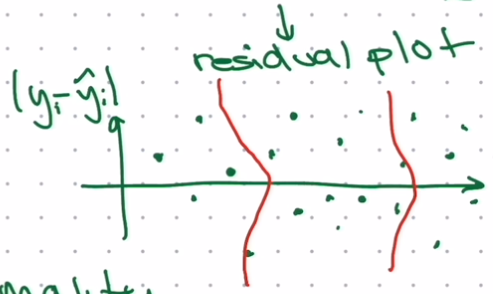



Homoskedasticity means the variance around these points should bee the same. An example where this assumption doesnt help is where the spread is uneven.

The linearity assumption also doesnt work with points where the line of best fit is not a straight line.

Linear regression method is only used when the four assumptions are fulfilled.


# Evaluation of Linear Regression model

**MEAN ABSOLUTE ERROR (MAE)**

Take all the errors (or residuals) and divide number of points.


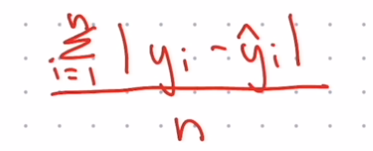





**MEAN SQUARED ERROR**

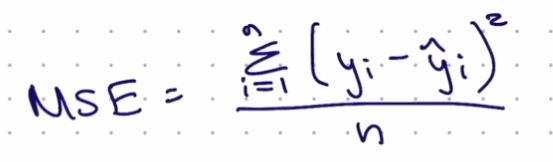

Such a calculation helps in punishing large errors. Also, it will be more useful moving forward as an absolute value function is not helpful everywhere, while the quadratic funtion is differentiable. One down side of this method is that the mean we calculated is in squared while the value we talk about is in power raised to 1. Hence, to fix this issue, we can use something called Root Mean Squared error.


**ROOT MEAN SQUARED ERROR**


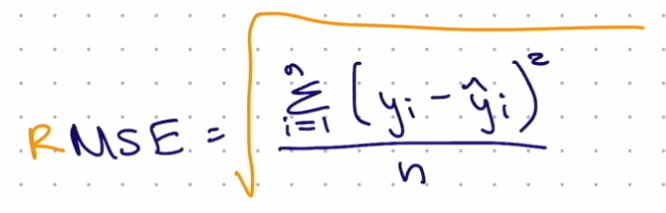






# LINEAR REGRESSION - COEFFICIENT OF DETERMINATION

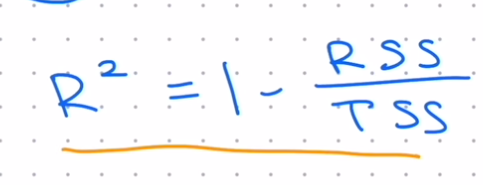


RSS stands for the sum of squared residuals.

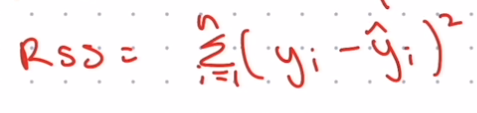



TSS is the total sum of squares. Instead of being with respect to the prediction, it is with respect to the mean of the actual values.




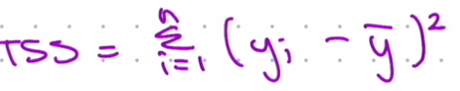




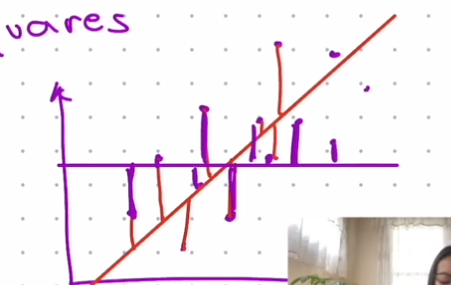


The square power punishes bigger errors. As rhe line of best fit becomes more and more accurate, the ratio RSS/TSS tends to 0. Hence, the coefficient tends to 1. When we add some extra y-value, the R^2 becomes higher.

The code for execution is in another colab ter